In [65]:
import numpy as np
from PIL import Image

In [66]:
def array_to_grayscale_image_alt(arr, save_path=None):
    """
    Alternate method using frombytes to create the image.
    0 => black, 1 => white.
    """
    arr_clamped = np.clip(arr, 0, 1)
    arr_8bit = (arr_clamped * 255).astype(np.uint8)

    # Dimensions: (width, height) = (num_columns, num_rows)
    h, w = arr_8bit.shape
    # Create the image directly from raw bytes in 'L' mode
    image = Image.frombytes('L', (w, h), arr_8bit.tobytes())

    if save_path:
        image.save(save_path)

    return image

In [67]:
def scale_height(img, scale_factor=100):
    width = img.width *100
    height = img.height *100

    resized_img = img.resize((width, height), resample=Image.NEAREST)

    return resized_img

In [68]:
array = np.array([[0,0,0,0,0,1,0,0,0,0,0]])

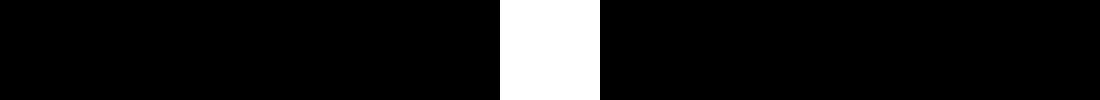

In [69]:
scale_height(array_to_grayscale_image_alt(array, 'test.png'), 100)

In [70]:
kernel = [[0.022,0.098,0.162,0.098,0.022]]

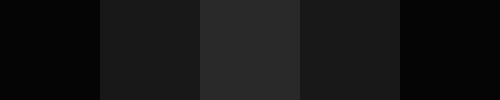

In [71]:
scale_height(array_to_grayscale_image_alt(kernel, 'kernal.png'), 100)

In [72]:
def apply_convolution(array, kernel):
    kernel_1d = kernel[0]
    kernel_size = kernel_1d.shape[0]

    # We'll pad left and right by kernel_size//2 for 'same' behavior
    padding = kernel_size // 2

    # Pad horizontally (2nd dimension); no vertical padding (1st dimension)
    padded_array = np.pad(array, ((0, 0), (padding, padding)), mode='constant')
    print(padded_array)

    # Prepare output
    output_array = np.zeros_like(array, dtype=float)

    rows, cols = array.shape
    for i in range(rows):
        for j in range(cols):
            # region covers j..j+kernel_size in the *padded* array
            region = padded_array[i, j : j + kernel_size]
            # Multiply–accumulate
            output_array[i, j] = np.sum(region * kernel_1d)

    return output_array

In [73]:
array = np.array([np.zeros(11)])
array[0][len(array[0])//2] = 1
kernel = np.array(kernel)

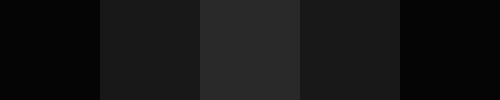

In [74]:
scale_height(array_to_grayscale_image_alt(kernel, 'test2.png'))

In [75]:
array_to_grayscale_image_alt(array, 'test2.png')

In [81]:
array

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

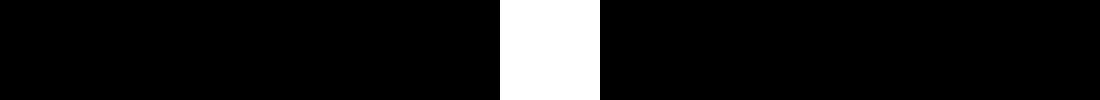

In [76]:
scale_height(array_to_grayscale_image_alt(array, 'test2.png'))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


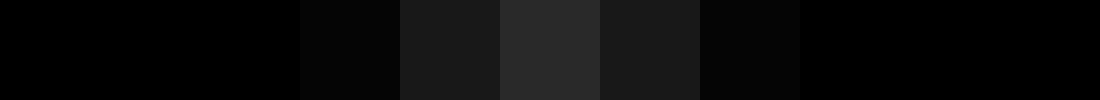

In [77]:
scale_height(array_to_grayscale_image_alt(apply_convolution(array,kernel), 'test2.png'))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.    0.    0.022 0.098 0.162 0.098 0.022 0.    0.
  0.    0.    0.   ]]


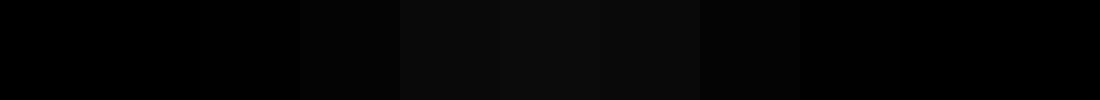

In [78]:
scale_height(array_to_grayscale_image_alt(apply_convolution(apply_convolution(array,kernel),kernel), 'test2.png'))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.    0.    0.022 0.098 0.162 0.098 0.022 0.    0.
  0.    0.    0.   ]]
[[0.       0.       0.       0.000484 0.004312 0.016732 0.036064 0.04642
  0.036064 0.016732 0.004312 0.000484 0.       0.       0.      ]]


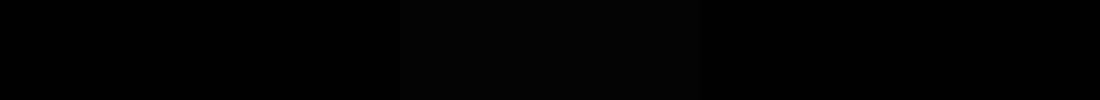

In [79]:
scale_height(array_to_grayscale_image_alt(apply_convolution(apply_convolution(apply_convolution(array, kernel),kernel),kernel), 'test2.png'))

In [80]:
apply_convolution(apply_convolution(array,kernel),kernel)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.    0.    0.022 0.098 0.162 0.098 0.022 0.    0.
  0.    0.    0.   ]]


array([[0.      , 0.000484, 0.004312, 0.016732, 0.036064, 0.04642 ,
        0.036064, 0.016732, 0.004312, 0.000484, 0.      ]])